In [323]:
import pandas as pd
import numpy as np

In [89]:
placement = pd.read_csv('data/AMSPlacement.csv')
placement_detail = pd.read_csv('data/AMSPlacementDetail.csv')
campaign = pd.read_csv('data/AMSCampaign.csv')

In [90]:
placement = placement.rename(columns= {"placement": "placement_type"})
placement_detail = placement_detail.join(placement.set_index('id'), on = 'placement')

In [91]:
placement_detail.T

,0,1,2,3,4,5,6,7,8,9,...,5837,5838,5839,5840,5841,5842,5843,5844,5845,5846
id,1,2,3,4,5,6,7,8,9,10,...,5840,5841,5842,5843,5844,5845,5846,5847,5848,5849
placement,5698,5698,5698,5698,5698,5698,5698,5705,5705,5705,...,31229,31229,31229,31229,31229,31235,31235,31235,31235,31235
date,10/13/19,10/14/19,10/15/19,10/16/19,10/17/19,10/18/19,10/19/19,10/13/19,10/14/19,10/15/19,...,10/1/19,10/2/19,10/3/19,10/4/19,10/5/19,9/29/19,9/30/19,10/1/19,10/2/19,10/3/19
impressions,149,145,129,121,88,100,129,1765,1372,772,...,69,64,71,56,63,143,90,39,54,52
clicks,3,4,3,3,5,3,6,6,13,13,...,0,1,0,0,0,2,0,0,0,0
CtR,0.020134,0.027586,0.023256,0.024793,0.056818,0.03,0.046512,0.003399,0.009475,0.016839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CpC,0.35,0.58,0.6,0.7,0.53,1.58,0.67,0.52,0.51,0.51,...,NaN,0.41,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN
spend,1.05,2.31,1.8,2.1,2.66,4.74,4.01,3.09,6.61,6.63,...,0,0.41,0,0,0,0.92,0,0,0,0
ACoS,0.015996,0.077154,0.276074,0.060276,0.13634,NaN,0.065363,NaN,0.144829,0.167424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoAS,0.6251,0.1296,0.0362,0.1659,0.0733,0,0.153,0,0.069,0.0597,...,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [92]:
placement_detail.placement_type.unique()

array(['Top of Search', 'Other Placements', 'Product pages on Amazon',
       'Rest of search on Amazon', 'First page Top of Search on Amazon',
       'Remarketing off-Amazon'], dtype=object)

In [93]:
results_by_placement = placement_detail.groupby(placement_detail.placement_type)[
    'impressions', 
    'clicks', 
    'spend', 
    'sales', 
    'orders', 
    'units'].sum().reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [94]:
results_by_placement['ROI'] = results_by_placement.sales / results_by_placement.spend
results_by_placement.sort_values(by = 'ROI', ascending = False)

,placement_type,impressions,clicks,spend,sales,orders,units,ROI
1,Other Placements,152156,223,111.99,1380.82,52,96,12.329851
5,Top of Search,148690,2249,1743.47,12331.69,578,823,7.073073
0,First page Top of Search on Amazon,108655,3093,4301.34,18568.96,1119,1580,4.317017
4,Rest of search on Amazon,1021963,3403,3974.47,8282.33,753,970,2.083883
2,Product pages on Amazon,3028248,3736,6157.14,6735.95,531,657,1.094006
3,Remarketing off-Amazon,78994,92,38.81,30.72,3,4,0.791549


In [95]:
placement_detail.campaign.unique()

array([   93,   100,   107,   114,    28,    14,     1,    21,    13,
        1240, 52171,  1251,  1238,  1230,  1236, 52191,  1252,  1241,
        1235,  1243,  1242,  1232,  1246,  1223,  1245,  1247,  1250,
        1231,  1239,  1248,  1237,  1234,  1226, 52292, 52409,  1233,
        1229,  1249,  1244, 55305, 55306])

# Placement - file for ML model

In [660]:
placementML = placement_detail[['date', 'impressions', 'clicks', 'spend', 'sales', 'orders', 'units', 'page_views', 'campaign', 'placement_type']]

In [661]:
placementML = placementML.join(campaign.set_index('id'), on='campaign')

In [662]:
placementML['CpC'] = placementML.spend / placementML.clicks
placementML['price'] = placementML.sales / placementML.units
placementML['CTR'] = placementML.clicks / placementML.impressions * 100

In [663]:
placementML = placementML.drop(columns = ['Unnamed: 0', 'name', 'currency', 'attribution_period', 'end_date'])

In [818]:
placementML.T

,0,1,2,3,4,5,6,7,8,9,...,5837,5838,5839,5840,5841,5842,5843,5844,5845,5846
date,10/13/19,10/14/19,10/15/19,10/16/19,10/17/19,10/18/19,10/19/19,10/13/19,10/14/19,10/15/19,...,10/1/19,10/2/19,10/3/19,10/4/19,10/5/19,9/29/19,9/30/19,10/1/19,10/2/19,10/3/19
impressions,149,145,129,121,88,100,129,1765,1372,772,...,69,64,71,56,63,143,90,39,54,52
clicks,3,4,3,3,5,3,6,6,13,13,...,0,1,0,0,0,2,0,0,0,0
spend,1.05,2.31,1.8,2.1,2.66,4.74,4.01,3.09,6.61,6.63,...,0,0.41,0,0,0,0.92,0,0,0,0
sales,65.64,29.94,6.52,34.84,19.51,0,61.35,0,45.64,39.6,...,0,0,0,0,0,0,0,0,0,0
orders,3,1,1,2,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
units,6,1,1,2,1,0,3,0,2,1,...,0,0,0,0,0,0,0,0,0,0
page_views,8,12,21,4,6,21,3,3,12,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,93,93,93,93,93,93,93,100,100,100,...,1234,1234,1234,1234,1234,1226,1226,1226,1226,1226
placement_type,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,...,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon


In [665]:
placementML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5847 non-null   object 
 1   impressions       5847 non-null   int64  
 2   clicks            5847 non-null   int64  
 3   spend             5847 non-null   float64
 4   sales             5847 non-null   float64
 5   orders            5847 non-null   int64  
 6   units             5847 non-null   int64  
 7   page_views        1169 non-null   float64
 8   campaign          5847 non-null   int64  
 9   placement_type    5847 non-null   object 
 10  portfolio         5847 non-null   int64  
 11  type              5847 non-null   object 
 12  targeting_type    4617 non-null   object 
 13  bidding_strategy  4678 non-null   object 
 14  start_date        4617 non-null   object 
 15  daily_budget      4617 non-null   float64
 16  CpC               3174 non-null   float64


In [666]:
placementML.to_csv('dataML/ML_placement.csv')

# Placement - effect for 3 types of campaigns (SB, SP, SD)

In [667]:
placementML

,date,impressions,clicks,spend,sales,orders,units,page_views,campaign,placement_type,portfolio,type,targeting_type,bidding_strategy,start_date,daily_budget,CpC,price,CTR
0,10/13/19,149,3,1.05,65.64,3,6,8.0,93,Top of Search,1,SB,NaN,NaN,NaN,NaN,0.3500,10.94,2.013423
1,10/14/19,145,4,2.31,29.94,1,1,12.0,93,Top of Search,1,SB,NaN,NaN,NaN,NaN,0.5775,29.94,2.758621
2,10/15/19,129,3,1.80,6.52,1,1,21.0,93,Top of Search,1,SB,NaN,NaN,NaN,NaN,0.6000,6.52,2.325581
3,10/16/19,121,3,2.10,34.84,2,2,4.0,93,Top of Search,1,SB,NaN,NaN,NaN,NaN,0.7000,17.42,2.479339
4,10/17/19,88,5,2.66,19.51,1,1,6.0,93,Top of Search,1,SB,NaN,NaN,NaN,NaN,0.5320,19.51,5.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,9/29/19,143,2,0.92,0.00,0,0,NaN,1226,Rest of search on Amazon,4,SP,Manual targeting,Dynamic bids - down only,2/6/18,100.0,0.4600,NaN,1.398601
5843,9/30/19,90,0,0.00,0.00,0,0,NaN,1226,Rest of search on Amazon,4,SP,Manual targeting,Dynamic bids - down only,2/6/18,100.0,NaN,NaN,0.000000
5844,10/1/19,39,0,0.00,0.00,0,0,NaN,1226,Rest of search on Amazon,4,SP,Manual targeting,Dynamic bids - down only,2/6/18,100.0,NaN,NaN,0.000000
5845,10/2/19,54,0,0.00,0.00,0,0,NaN,1226,Rest of search on Amazon,4,SP,Manual targeting,Dynamic bids - down only,2/6/18,100.0,NaN,NaN,0.000000


In [668]:
placements_campaign_type = placementML.groupby([placementML.type, placementML.placement_type])[
    'impressions', 
    'clicks', 
    'spend', 
    'sales', 
    'orders', 
    'units'].sum().reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [669]:
placements_campaign_type['ROI'] = placements_campaign_type.sales / placements_campaign_type.spend
placements_campaign_type.sort_values(by = 'ROI', ascending = False)

,type,placement_type,impressions,clicks,spend,sales,orders,units,ROI
0,SB,Other Placements,152156,223,111.99,1380.82,52,96,12.329851
1,SB,Top of Search,148690,2249,1743.47,12331.69,578,823,7.073073
2,SP,First page Top of Search on Amazon,108655,3093,4301.34,18568.96,1119,1580,4.317017
5,SP,Rest of search on Amazon,1021963,3403,3974.47,8282.33,753,970,2.083883
3,SP,Product pages on Amazon,3028248,3736,6157.14,6735.95,531,657,1.094006
4,SP,Remarketing off-Amazon,78994,92,38.81,30.72,3,4,0.791549


# Placement ML modeling

In [618]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## result - impressions

In [713]:
data = placementML[['CTR','placement_type', 'type', 'portfolio', 'price']]

In [714]:
data = data.replace({'portfolio': 11883}, 7)

In [715]:
data = data[data.type == 'SP']

In [716]:
data

,CTR,placement_type,type,portfolio,price
1169,0.148724,Product pages on Amazon,SP,1,2.774286
1170,0.066622,Product pages on Amazon,SP,1,NaN
1171,0.089628,Product pages on Amazon,SP,1,22.950000
1172,0.109785,Product pages on Amazon,SP,1,NaN
1173,0.221578,Product pages on Amazon,SP,1,NaN
...,...,...,...,...,...
5842,1.398601,Rest of search on Amazon,SP,4,NaN
5843,0.000000,Rest of search on Amazon,SP,4,NaN
5844,0.000000,Rest of search on Amazon,SP,4,NaN
5845,0.000000,Rest of search on Amazon,SP,4,NaN


In [717]:
#needs to be changed to dummies 

# placement_type = data.placement_type.unique()
# le = LabelEncoder()
# le.fit(placement_type)
# le.classes_

In [718]:
#data.placement_type = le.transform(data.placement_type)

In [719]:
#getting dummies
dums = pd.get_dummies(data.placement_type)
data = pd.concat([data, dums], axis = 1)
data

,CTR,placement_type,type,portfolio,price,First page Top of Search on Amazon,Product pages on Amazon,Remarketing off-Amazon,Rest of search on Amazon
1169,0.148724,Product pages on Amazon,SP,1,2.774286,0,1,0,0
1170,0.066622,Product pages on Amazon,SP,1,NaN,0,1,0,0
1171,0.089628,Product pages on Amazon,SP,1,22.950000,0,1,0,0
1172,0.109785,Product pages on Amazon,SP,1,NaN,0,1,0,0
1173,0.221578,Product pages on Amazon,SP,1,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5842,1.398601,Rest of search on Amazon,SP,4,NaN,0,0,0,1
5843,0.000000,Rest of search on Amazon,SP,4,NaN,0,0,0,1
5844,0.000000,Rest of search on Amazon,SP,4,NaN,0,0,0,1
5845,0.000000,Rest of search on Amazon,SP,4,NaN,0,0,0,1


In [720]:
data = data.drop(columns = ['placement_type', 'type'])

In [721]:
data = data.dropna(axis=0)

In [722]:
# campaign_type = data.type.unique()
# le_type = LabelEncoder()
# le_type.fit(campaign_type)
# le_type.classes_

In [723]:
#data.type = le_type.transform(data.type)

In [724]:
data

,CTR,portfolio,price,First page Top of Search on Amazon,Product pages on Amazon,Remarketing off-Amazon,Rest of search on Amazon
1169,0.148724,1,2.774286,0,1,0,0
1171,0.089628,1,22.950000,0,1,0,0
1180,0.221893,3,2.840000,0,1,0,0
1181,0.188223,3,7.590000,0,1,0,0
1183,0.058462,3,9.490000,0,1,0,0
...,...,...,...,...,...,...,...
5812,0.579374,4,14.390000,0,0,0,1
5813,0.292969,4,14.390000,0,0,0,1
5814,1.351351,4,19.410000,0,0,0,1
5815,2.409639,4,14.390000,0,0,0,1


In [725]:
y = data.CTR
X = data.drop(columns = ['CTR'])

In [726]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2)

## model - linear regression

In [727]:
modelLR = LinearRegression()
modelLR.fit(Xtrain, ytrain,)
y_pred = modelLR.predict(X)
y_test_pred = modelLR.predict(Xtest)
modelLR.score(Xtest, ytest)

0.2938261580383559

In [728]:
modelLR.coef_

array([ 0.20210185, -0.05497077,  5.44196421, -1.86230903, -2.77566309,
       -0.80399209])

In [729]:
np.sqrt(mean_squared_error(y, y_pred))

5.044615681716266

In [730]:
np.sqrt(mean_squared_error(ytest, y_test_pred))

6.571989300906559

## model - decision tree

In [731]:
regressor = DecisionTreeRegressor()
cross_val_score(regressor, X, y, cv=10)

regressor.fit(Xtrain, ytrain)
y_pred = regressor.predict(X)
y_test_pred = regressor.predict(Xtest)
regressor.score(Xtest, ytest)

0.24394866168902452

In [732]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(3.9093192324535937, 6.800121583243141)

In [733]:
regressor.feature_importances_

array([2.46693837e-01, 3.27124956e-01, 4.17754111e-01, 2.38856774e-08,
       1.94718547e-07, 8.42687815e-03])

## model - random forest

In [734]:
regr = RandomForestRegressor()
regr.fit(Xtrain, ytrain)
y_pred = regr.predict(X)
y_test_pred = regr.predict(Xtest)
regr.score(Xtest, ytest)

0.3836336422289095

In [735]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(3.856489800426813, 6.139888686493733)

## model - gradient boosting regressor

In [736]:
reg = GradientBoostingRegressor()

reg.fit(Xtrain, ytrain)
y_pred = reg.predict(X)
y_test_pred = reg.predict(Xtest)
reg.score(Xtest, ytest)

0.42418648295591

In [737]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(4.1534066384174855, 5.934470322364986)

In [738]:
np.mean(cross_val_score(estimator = reg, X = Xtrain, y = ytrain, cv = 10))


0.3251287053337685

In [739]:
a = reg.feature_importances_
names = list(data.columns)[1:]
for num in zip(list(a), names):
    print(num)

(0.21084979416195823, 'portfolio')
(0.21229671404892403, 'price')
(0.56493245384946, 'First page Top of Search on Amazon')
(0.00037994139630080273, 'Product pages on Amazon')
(0.0, 'Remarketing off-Amazon')
(0.011541096543356907, 'Rest of search on Amazon')


In [740]:
data.T

,1169,1171,1180,1181,1183,1194,1202,1210,1212,1213,...,5792,5794,5795,5799,5804,5812,5813,5814,5815,5821
CTR,0.148724,0.089628,0.221893,0.188223,0.058462,0.082576,1.5625,0.934579,1.358696,0.717703,...,0.583279,0.242033,0.15932,0.160308,1.342282,0.579374,0.292969,1.351351,2.409639,0.483871
portfolio,1.000000,1.000000,3.000000,3.000000,3.000000,6.000000,6.0000,3.000000,3.000000,3.000000,...,5.000000,2.000000,2.00000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000
price,2.774286,22.950000,2.840000,7.590000,9.490000,3.580000,8.2350,9.490000,5.740000,22.330000,...,7.970000,19.950000,23.57000,23.570000,9.490000,14.390000,14.390000,19.410000,14.390000,25.195000
First page Top of Search on Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Product pages on Amazon,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Remarketing off-Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rest of search on Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Time series

In [816]:
import plotly.express as px

In [819]:
placementML.T

,0,1,2,3,4,5,6,7,8,9,...,5837,5838,5839,5840,5841,5842,5843,5844,5845,5846
date,10/13/19,10/14/19,10/15/19,10/16/19,10/17/19,10/18/19,10/19/19,10/13/19,10/14/19,10/15/19,...,10/1/19,10/2/19,10/3/19,10/4/19,10/5/19,9/29/19,9/30/19,10/1/19,10/2/19,10/3/19
impressions,149,145,129,121,88,100,129,1765,1372,772,...,69,64,71,56,63,143,90,39,54,52
clicks,3,4,3,3,5,3,6,6,13,13,...,0,1,0,0,0,2,0,0,0,0
spend,1.05,2.31,1.8,2.1,2.66,4.74,4.01,3.09,6.61,6.63,...,0,0.41,0,0,0,0.92,0,0,0,0
sales,65.64,29.94,6.52,34.84,19.51,0,61.35,0,45.64,39.6,...,0,0,0,0,0,0,0,0,0,0
orders,3,1,1,2,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
units,6,1,1,2,1,0,3,0,2,1,...,0,0,0,0,0,0,0,0,0,0
page_views,8,12,21,4,6,21,3,3,12,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,93,93,93,93,93,93,93,100,100,100,...,1234,1234,1234,1234,1234,1226,1226,1226,1226,1226
placement_type,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,Top of Search,...,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon,Rest of search on Amazon


In [806]:
placementML.placement_type.unique()

array(['Top of Search', 'Other Placements', 'Product pages on Amazon',
       'Rest of search on Amazon', 'First page Top of Search on Amazon',
       'Remarketing off-Amazon'], dtype=object)

In [741]:
placementML.campaign.unique()

array([   93,   100,   107,   114,    28,    14,     1,    21,    13,
        1240, 52171,  1251,  1238,  1230,  1236, 52191,  1252,  1241,
        1235,  1243,  1242,  1232,  1246,  1223,  1245,  1247,  1250,
        1231,  1239,  1248,  1237,  1234,  1226, 52292, 52409,  1233,
        1229,  1249,  1244, 55305, 55306])

In [807]:
#time_data = placementML[placementML.placement_type ==  'Top of Search']
time_data = placementML
time_data['time'] = pd.to_datetime(time_data.date)
time_data.sort_values(by='time')
time_data.portfolio.unique()
time_data.placement_type.unique()

array(['Top of Search', 'Other Placements', 'Product pages on Amazon',
       'Rest of search on Amazon', 'First page Top of Search on Amazon',
       'Remarketing off-Amazon'], dtype=object)

In [838]:
mask =  (time_data.portfolio == 2)
data = time_data[mask]
data.placement_type.unique()
data = data[data.placement_type == 'First page Top of Search on Amazon']

In [839]:
fig = px.line(data, x='time', y='units')
fig.show()

# Time Series Prediction

In [849]:
from fbprophet import Prophet
m = Prophet()


In [850]:
df = data[['clicks', 'time']].rename(columns={"clicks": "y", "time": "ds"})
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
591,2020-09-23
592,2020-09-24
593,2020-09-25
594,2020-09-26
595,2020-09-27


In [851]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
591,2020-09-23,3.912770,1.757102,6.148367
592,2020-09-24,3.728218,1.455034,5.940428
593,2020-09-25,3.541966,1.335590,5.716455
594,2020-09-26,4.198447,2.063849,6.341859
595,2020-09-27,4.498697,2.150881,6.694366


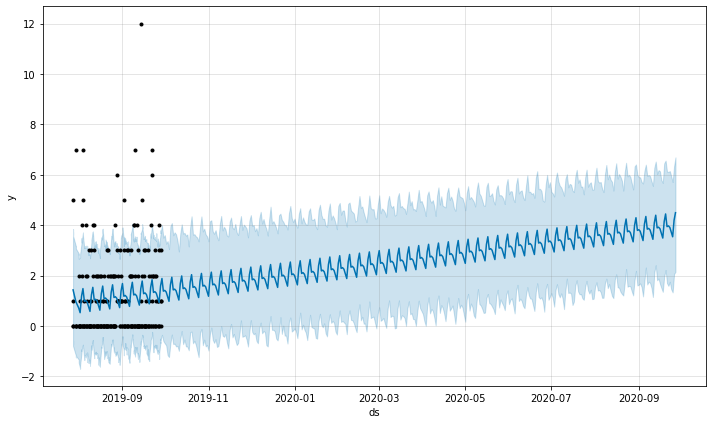

In [852]:
fig1 = m.plot(forecast)

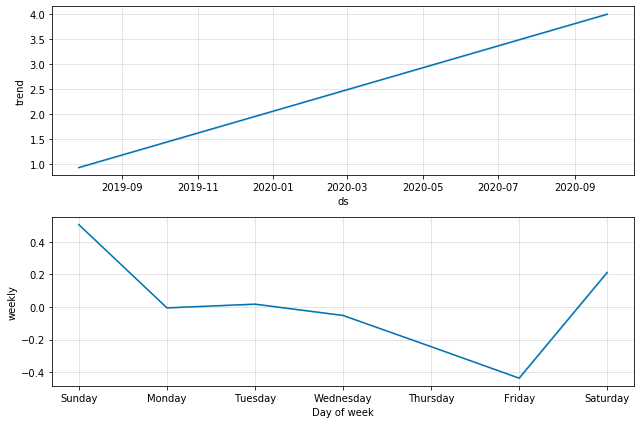

In [853]:
fig2 = m.plot_components(forecast)

In [854]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [855]:
plot_components_plotly(m, forecast)